In [ ]:
import numpy as np
import pandas as pd
import tensorflow as tf
import keras
import librosa
import pylab
import os
import librosa.display

In [ ]:
def feature_extractor(path, custpath, name):

  try:
    audio,sr = librosa.load(path)
    #Mel Spectogram
    pylab.axis('off') # no axis
    pylab.axes([0., 0., 1., 1.], frameon=False, xticks=[], yticks=[])
    melspec  = librosa.feature.melspectrogram(y=audio,sr=sr)
    s_db     = librosa.power_to_db(melspec, ref=np.max)
    librosa.display.specshow(s_db)
    
    savepath = os.path.join(custpath,name+'.png')
    pylab.savefig(savepath, bbox_inches=None, pad_inches=0)
    pylab.close()
  except:
    print('File cannot open')
    return None

  return savepath

In [ ]:
path = '/content/drive/MyDrive/torgo_data'

In [ ]:
mel_path = '/content/drive/MyDrive/torgo_mel_spec'

In [ ]:
len(os.listdir('/content/drive/MyDrive/torgo_data/non_dysarthria_female'))

500

In [ ]:
from keras.layers import Input, Lambda, Dense, Flatten,Conv2D,MaxPooling2D,Dropout,Flatten
from keras.models import Model,Sequential
#from keras.applications.resnet50 import ResNet50
from keras.applications.vgg16 import VGG16
from keras.applications.vgg16 import preprocess_input
from keras.preprocessing import image
from keras.preprocessing.image import ImageDataGenerator
from keras.models import Sequential
import numpy as np
from glob import glob
import matplotlib.pyplot as plt
import os

In [ ]:
import cv2
import os
import glob

train_data = []
train_labels = []

for per in os.listdir('drive/MyDrive/torgo_mel_spec/'):
    for data in glob.glob('drive/MyDrive/torgo_mel_spec/' +per+'/*.*'):
        img = cv2.imread(data)
        img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
        img = cv2.resize(img, (224,224))
        train_data.append([img])
        if per=="dysarthria_female":
            train_labels.append(np.array(0))
        elif(per=="dysarthria_male"):
            train_labels.append(np.array(1))
        elif(per=="non_dysarthria_female"):
            train_labels.append(np.array(2))
        else :
            train_labels.append(np.array(3))
train_data = np.array(train_data)/255.0
train_labels = np.array(train_labels)

In [ ]:
print(train_labels)

[array(0), array(0), array(0), array(0), array(0), array(0), array(0), array(0), array(0), array(0), array(0), array(0), array(0), array(0), array(0), array(0), array(0), array(0), array(0), array(0), array(0), array(0), array(0), array(0), array(0), array(0), array(0), array(0), array(0), array(0), array(0), array(0), array(0), array(0), array(0), array(0), array(0), array(0), array(0), array(0), array(0), array(0), array(0), array(0), array(0), array(0), array(0), array(0), array(0), array(0), array(0), array(0), array(0), array(0), array(0), array(0), array(0), array(0), array(0), array(0), array(0), array(0), array(0), array(0), array(0), array(0), array(0), array(0), array(0), array(0), array(0), array(0), array(0), array(0), array(0), array(0), array(0), array(0), array(0), array(0), array(0), array(0), array(0), array(0), array(0), array(0), array(0), array(0), array(0), array(0), array(0), array(0), array(0), array(0), array(0), array(0), array(0), array(0), array(0), array(0),

In [ ]:
from tensorflow.keras.utils import to_categorical
train_labels = to_categorical(train_labels)

In [ ]:
train_data = train_data.reshape(-1, 224,224, 3)

In [ ]:
train_labels.shape

(1999, 4)

In [ ]:
# #######################################################################################3

In [ ]:
from keras.models import Sequential, Model, load_model
from keras import applications
from keras import optimizers
from keras.layers import Dropout, Flatten, Dense
from tensorflow.keras.optimizers import Adam
import tensorflow as tf

base_model =tf.keras.applications.VGG16(
    include_top= False,
    weights='imagenet',
    input_tensor=None,
    input_shape=(224,224,3),
)
base_model.summary()

58889256/58889256 [==============================] - 0s 0us/step
Model: "vgg16"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_2 (InputLayer)        [(None, 224, 224, 3)]     0         
                                                                 
 block1_conv1 (Conv2D)       (None, 224, 224, 64)      1792      
                                                                 
 block1_conv2 (Conv2D)       (None, 224, 224, 64)      36928     
                                                                 
 block1_pool (MaxPooling2D)  (None, 112, 112, 64)      0         
                                                                 
 block2_conv1 (Conv2D)       (None, 112, 112, 128)     73856     
                                                                 
 block2_conv2 (Conv2D)       (None, 112, 112, 128)     147584    
                                                              

In [ ]:
i=0
while i != 5:
    base_model.layers[i].trainable = False
    i+=1
add_model = Sequential()
add_model.add(Flatten(input_shape=base_model.output_shape[1:]))
add_model.add(Dense(256, activation='relu'))
add_model.add(Dense(4, activation='softmax'))

model = Model(inputs=base_model.input, outputs=add_model(base_model.output))
model.compile(loss='categorical_crossentropy', optimizer=tf.optimizers.Adam(lr=1e-4),
              metrics=['accuracy'])

model.summary()

Model: "model_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_2 (InputLayer)        [(None, 224, 224, 3)]     0         
                                                                 
 block1_conv1 (Conv2D)       (None, 224, 224, 64)      1792      
                                                                 
 block1_conv2 (Conv2D)       (None, 224, 224, 64)      36928     
                                                                 
 block1_pool (MaxPooling2D)  (None, 112, 112, 64)      0         
                                                                 
 block2_conv1 (Conv2D)       (None, 112, 112, 128)     73856     
                                                                 
 block2_conv2 (Conv2D)       (None, 112, 112, 128)     147584    
                                                                 
 block2_pool (MaxPooling2D)  (None, 56, 56, 128)       0   

Epoch 1/10
47/47 [==============================] - 1654s 35s/step - loss: 0.6057 - accuracy: 0.7205 - val_loss: 9.6721 - val_accuracy: 0.0000e+00
Epoch 2/10
47/47 [==============================] - 1660s 35s/step - loss: 0.3007 - accuracy: 0.8826 - val_loss: 10.2695 - val_accuracy: 0.0000e+00
Epoch 3/10
47/47 [==============================] - 1641s 35s/step - loss: 0.2156 - accuracy: 0.9153 - val_loss: 10.8603 - val_accuracy: 0.0000e+00
Epoch 4/10
47/47 [==============================] - 1639s 35s/step - loss: 0.1332 - accuracy: 0.9513 - val_loss: 11.8049 - val_accuracy: 0.0000e+00
Epoch 5/10
47/47 [==============================] - 1637s 35s/step - loss: 0.0923 - accuracy: 0.9653 - val_loss: 16.9913 - val_accuracy: 0.0000e+00
Epoch 6/10
47/47 [==============================] - 1638s 35s/step - loss: 0.0715 - accuracy: 0.9753 - val_loss: 15.6098 - val_accuracy: 0.0000e+00
Epoch 7/10
47/47 [==============================] - 1639s 35s/step - loss: 0.0587 - accuracy: 0.9780 - val_loss: 

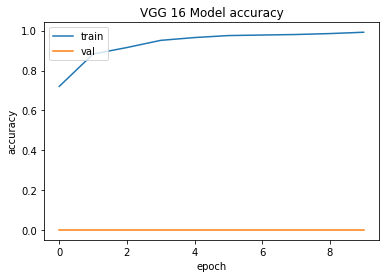

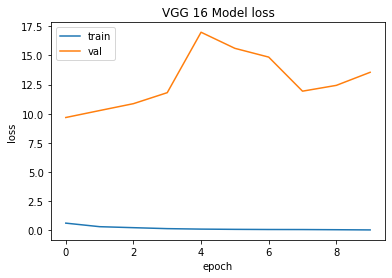

In [ ]:
from keras.callbacks import ModelCheckpoint, LearningRateScheduler, EarlyStopping, ReduceLROnPlateau, TensorBoard
earlyStopping = EarlyStopping(monitor='val_loss',
                              min_delta=0,
                              patience=3,
                              verbose=1)

early_stop=[earlyStopping]

progress = model.fit(train_data,train_labels, batch_size=32, epochs=10, validation_split=.25)

from matplotlib import pyplot as plt
plt.plot(progress.history['accuracy'])
plt.plot(progress.history['val_accuracy'])
plt.title('VGG 16 Model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'val'], loc='upper left')
plt.show()

plt.plot(progress.history['loss'])
plt.plot(progress.history['val_loss'])
plt.title('VGG 16 Model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'val'], loc='upper left')
plt.show()

In [ ]:
#####19

In [ ]:
from keras.models import Sequential, Model, load_model
from keras import applications
from keras import optimizers
from keras.layers import Dropout, Flatten, Dense
from tensorflow.keras.optimizers import Adam
import tensorflow as tf
+
base_model =tf.keras.applications.VGG16(
    include_top= False,
    weights='imagenet',
    input_tensor=None,
    input_shape=(224,224,3),
)
base_model.summary()

58889256/58889256 [==============================] - 2s 0us/step
Model: "vgg16"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_2 (InputLayer)        [(None, 224, 224, 3)]     0         
                                                                 
 block1_conv1 (Conv2D)       (None, 224, 224, 64)      1792      
                                                                 
 block1_conv2 (Conv2D)       (None, 224, 224, 64)      36928     
                                                                 
 block1_pool (MaxPooling2D)  (None, 112, 112, 64)      0         
                                                                 
 block2_conv1 (Conv2D)       (None, 112, 112, 128)     73856     
                                                                 
 block2_conv2 (Conv2D)       (None, 112, 112, 128)     147584    
                                                              

In [ ]:
i=0
while i != 5:
    base_model.layers[i].trainable = False
    i+=1
add_model = Sequential()
add_model.add(Flatten(input_shape=base_model.output_shape[1:]))
add_model.add(Dense(256, activation='relu'))
add_model.add(Dense(4, activation='softmax'))

model = Model(inputs=base_model.input, outputs=add_model(base_model.output))
model.compile(loss='categorical_crossentropy', optimizer=tf.optimizers.Adam(lr=1e-4),
              metrics=['accuracy'])

model.summary()

Model: "model_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_2 (InputLayer)        [(None, 224, 224, 3)]     0         
                                                                 
 block1_conv1 (Conv2D)       (None, 224, 224, 64)      1792      
                                                                 
 block1_conv2 (Conv2D)       (None, 224, 224, 64)      36928     
                                                                 
 block1_pool (MaxPooling2D)  (None, 112, 112, 64)      0         
                                                                 
 block2_conv1 (Conv2D)       (None, 112, 112, 128)     73856     
                                                                 
 block2_conv2 (Conv2D)       (None, 112, 112, 128)     147584    
                                                                 
 block2_pool (MaxPooling2D)  (None, 56, 56, 128)       0   

/usr/local/lib/python3.7/dist-packages/keras/optimizers/optimizer_v2/adam.py:110: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


Epoch 1/3
47/47 [==============================] - 2502s 53s/step - loss: 0.5174 - accuracy: 0.7645 - val_loss: 14.9640 - val_accuracy: 0.0000e+00
Epoch 2/3
47/47 [==============================] - 2495s 53s/step - loss: 0.2053 - accuracy: 0.9233 - val_loss: 10.5973 - val_accuracy: 0.0000e+00
Epoch 3/3
47/47 [==============================] - 2487s 53s/step - loss: 0.1400 - accuracy: 0.9506 - val_loss: 14.7377 - val_accuracy: 0.0000e+00


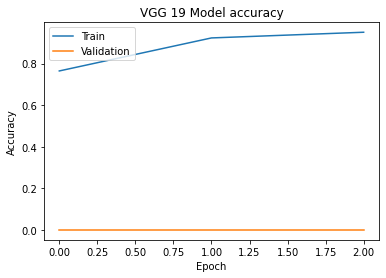

KeyError: ignored

In [ ]:
from keras.callbacks import ModelCheckpoint, LearningRateScheduler, EarlyStopping, ReduceLROnPlateau, TensorBoard
earlyStopping = EarlyStopping(monitor='val_loss',
                              min_delta=0,
                              patience=3,
                              verbose=1)

early_stop=[earlyStopping]

progress = model.fit(train_data,train_labels, batch_size=32, epochs=3, validation_split=.25)

from matplotlib import pyplot as plt
plt.plot(progress.history['accuracy'])
plt.plot(progress.history['val_accuracy'])
plt.title('VGG 19 Model accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'], loc='upper left')
plt.show()

plt.plot(progress.history['loss'])
plt.plot(progress.history['val_loss'])
plt.title('VGG 19 Model Loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'], loc='upper left')
plt.show()